In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix



In [7]:
# Cargar el dataset de vehículos
df = pd.read_csv('car data.csv')  # Asegúrate que el nombre coincida exactamente

# Ver las primeras filas del dataset
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
# Información general del dataset
df.info()

# Estadísticas descriptivas
df.describe()

# Ver nombres de columnas
print("Columnas:", df.columns.tolist())

# Ver valores únicos por columna
for col in df.columns:
    print(f"\nValores únicos en '{col}':\n", df[col].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
Columnas: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

Valores únicos en 'Car_Name':
 ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross'

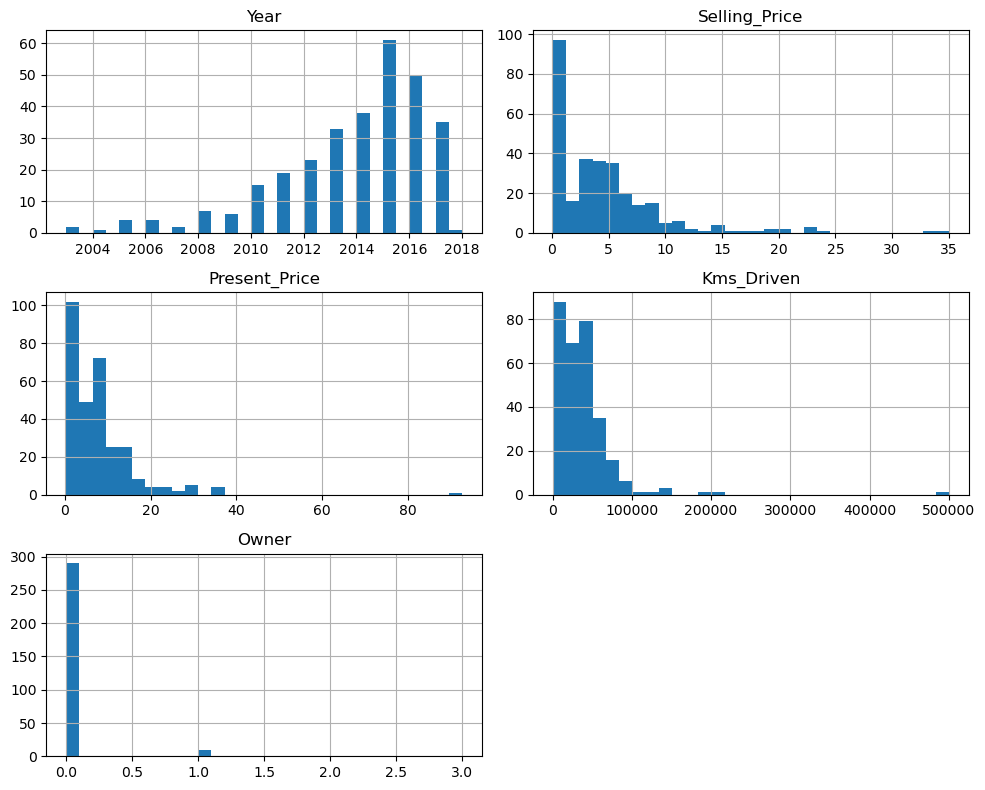

ValueError: could not convert string to float: 'ritz'

<Figure size 800x600 with 0 Axes>

In [11]:
# Histogramas
df.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Mapa de calor de correlaciones
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [13]:
# Crear una copia del dataframe
data = df.copy()

# Crear columna 'Car_Age' en vez de usar directamente el año
data['Car_Age'] = 2025 - data['Year']  # O usa el año actual

# Eliminar columnas que no aportan al modelo
data.drop(['Car_Name', 'Year'], axis=1, inplace=True)

# One Hot Encoding para columnas categóricas (convertir texto a números)
data = pd.get_dummies(data, drop_first=True)

# Mostrar cómo quedó el nuevo dataframe
data.head()



,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


In [15]:
# Definir variables independientes (X) y la variable dependiente (y)
X = data.drop('Selling_Price', axis=1)  # Features
y = data['Selling_Price']               # Target

# Dividir los datos: 70% entrenamiento, 30% prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Confirmar dimensiones
print("Shape de X_train:", X_train.shape)
print("Shape de X_test :", X_test.shape)


Shape de X_train: (210, 8)
Shape de X_test : (91, 8)


In [17]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
modelo_rl = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_rl.fit(X_train, y_train)

# Predecir con los datos de prueba
y_pred = modelo_rl.predict(X_test)



In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular R² y RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² (coeficiente de determinación): {r2:.4f}")
print(f"RMSE (raíz del error cuadrático medio): {rmse:.2f}")


R² (coeficiente de determinación): 0.8756
RMSE (raíz del error cuadrático medio): 1.88


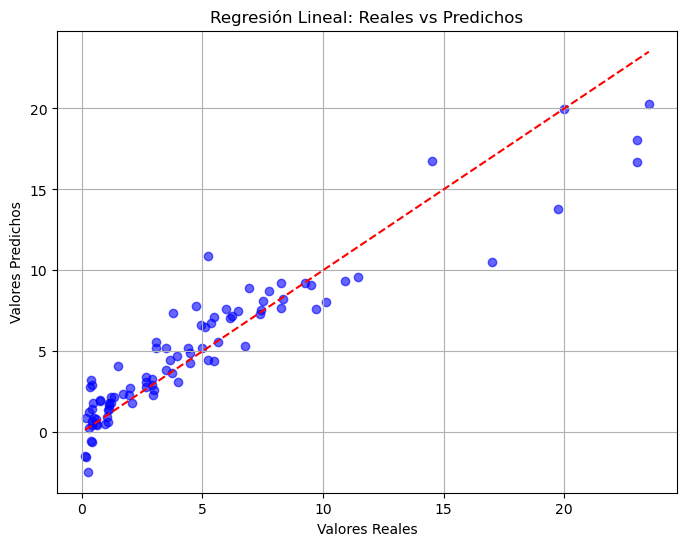

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Regresión Lineal: Reales vs Predichos")
plt.grid(True)
plt.show()
